A single-scale nomogram not quite using elliptic curves
=======

In 01953, Richard K. Guy,
[who would later discover the glider in Life](https://www.ams.org/notices/202204/rnoti-p574.pdf),
published [a short paper entitled “A single-scale nomogram”](https://www.cambridge.org/core/journals/mathematical-gazette/article/abs/2315-a-singlescale-nomogram/F633C7BBB100F24F0ECEB9789C0AD99E) (*The Mathematical Gazette*, Vol. 37, No. 319 (Feb. 1953), p. 39, DOI: 10.2307/3609499.)  The basics of his explanation are very simple:

> Since the equation $x^3 + ax + b = 0$ has zero for the sum of its roots, the $x$-coordinates of the three intersections of the line $y = mx + c$ and the curve $y = x^3 + px + q$ add to zero.  Thus a curve $y = x^3 + px + q$, graduated according to the antilogarithms of its $x$-coordinates, it becomes a nomogram for multiplication and division.

This is not *quite* an [elliptic curve](https://en.wikipedia.org/wiki/Elliptic_curve), which would be $y^2 = x^3 + ax + b$, but the zeroes are the same in both cases: $y^2 = 0 \iff y = 0$.

It wasn't obvious to me from looking at the equation that the sum of the roots was zero,
but it was clear that the intersections of $y = mx + c$ and $y = x^3 + px + q$
occur when $mx + c = x^3 + px + q$,
which is when $x^3 + (p - m)x + (q - c) = 0$,
so we get the original equation when $a = p - m$ and $b = q - c$.

Suppose we have a cubic in $\mathbb C$ with three roots $u, v, w$,
which can be factored as $(x - u)(x - v)(x - w)$
by the [fundamental theorem of algebra](https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra).
Multiplied out to polynomial form it becomes $x^3 - (u + v + w)x^2 + (uv + vw + wu)x - uvw$.
This will have a zero coefficient $-(u + v + w)$ on the quadratic term precisely when the roots sum to zero.

In [33]:
%pylab inline
import seaborn
matplotlib.style.use('seaborn-v0_8-poster')
rcParams['lines.linewidth'] = 1

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Guy points out that this means that you can use the graph of such a cubic,
labeled by its $x$-coordinates,
as a nomogram for addition and subtraction,
laying a straightedge across it.
Here's a poorly labeled example adding $0.3 + 0.4$, or subtracting $0.7 - 0.3$ or $0.7 - 0.4$:

(-0.24999962437424925, -0.25)

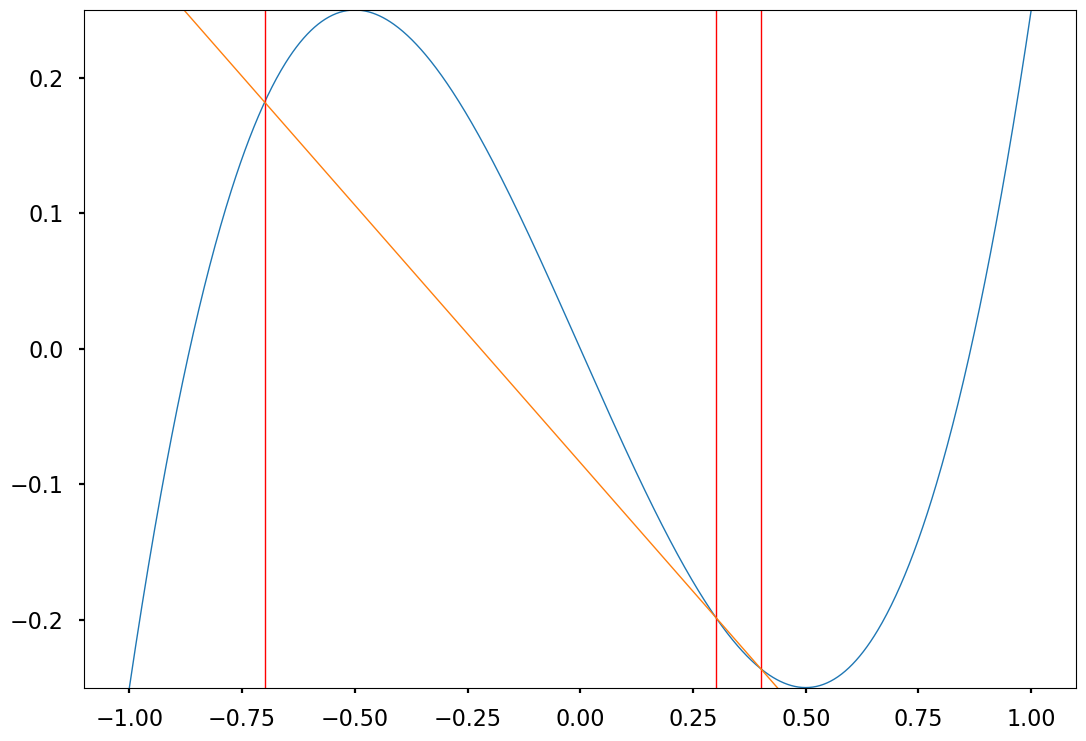

In [38]:
f = lambda x: x**3 - 3*x/4
xs = linspace(-1, 1, 1000)

plot(xs, f(xs))
ylim(-.25, +.25)
axvline(.3, color='r'); axvline(.4, color='r'); axvline(-.7, color='r')

def fit_line(x0, y0, x1, y1):
    m = (y1 - y0)/(x1 - x0)
    return m, y1 - m*x1

m, b = fit_line(.3, f(.3), .4, f(.4))
plot(xs, m*xs + b)

f(xs)[xs>0].min(), f(xs).min()

From that diagram, though, it's obvious that the precision at that point for subtraction is not very good,
because the straightedge is almost parallel to the curve, so a fairly large change in the $x$ coordinate
would be needed to move the line significantly — so even a tiny error in the placement of the edge
would result in a large error in the subtraction result.

Another difficulty is that it's easy to get lines that intersect outside the plotted part of the nomogram:

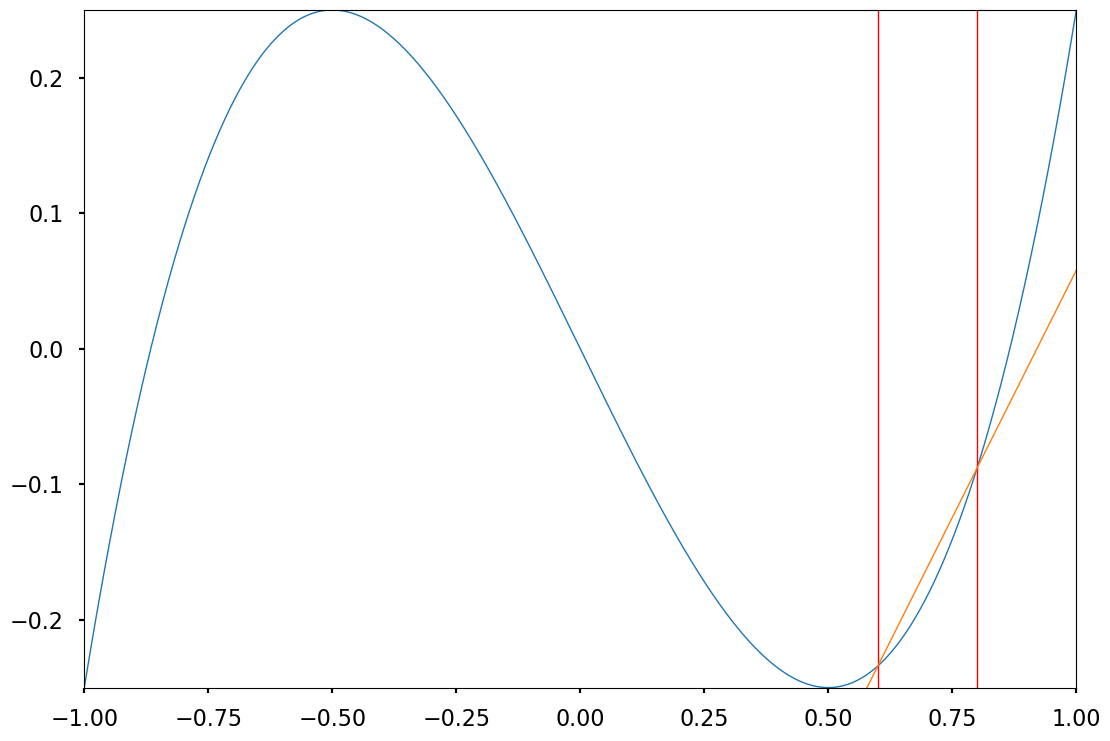

In [41]:
def nomo1(u, v, w):
    plot(xs, f(xs)); ylim(-.25, +.25); xlim(-1, +1)
    axvline(u, color='r'); axvline(v, color='r'); axvline(w, color='r')

    m, b = fit_line(u, f(u), v, f(v))
    plot(xs, m*xs + b)

nomo1(.6, .8, -1.4)

But for some problems, you can get a pretty nice precise result:

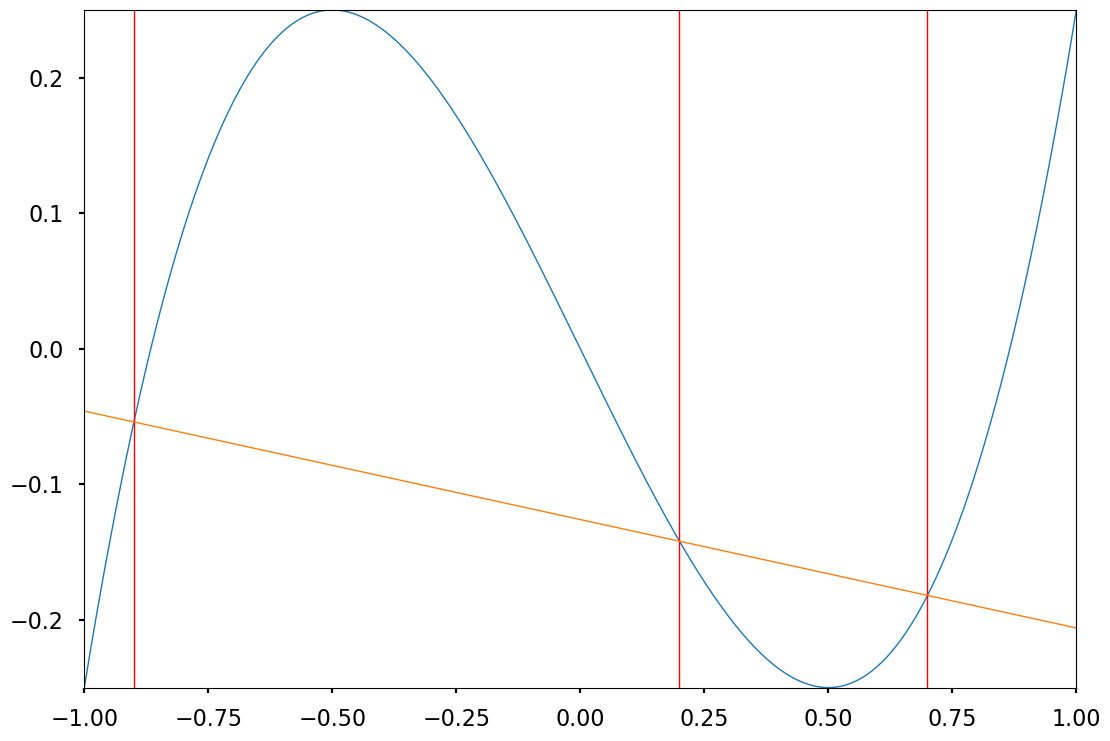

In [42]:
nomo1(.2, .7, -.9)

Guy points out that you can also label the scale on the nomogram using logarithms,
which converts multiplication and division into addition and subtraction.

Brother, I am troubled.  Something is wrong, and I do not know if the wrongness lies within the equations
or within myself.